In [50]:
# import dependencies
import numpy as np
import csv
import matplotlib.pyplot as plt

In [ ]:
# input parameters, change this section only
file_prefix="20221129-0002_"
file_num = 835
file_suffix = ".csv"
time_res = 2 * 1e-6

In [51]:
# polarization rotation speed change helper, do not change
def helper_calc(V1, V2, delta, prev):
    if V1+V2 == 0:
        return 0
    else:
        temp = np.abs((V1 - V2)/(V1 + V2))
        return 2 * np.arcsin((1/2)*np.abs(temp - prev) ) * (1 / delta)

In [52]:
# data processing
global_V1 = []
global_V2 = []
global_rot_speed = []
global_time = []

for i in range(1,file_num,1):
    filename = ""
    if i < 10:
        filename = file_prefix + "00" + str(i) + file_suffix
    elif i < 100:
        filename = file_prefix + "0"+str(i) + file_suffix
    else:
        filename = file_prefix +str(i) + file_suffix


    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        count = 0
        for row in reader:
            if count >= 1:
                global_V1.append(row["Channel A"])
                global_V2.append(row["Channel B"])
            count = count + 1

print(len(global_V1))

for i in range(len(global_V1)):
    global_time.append(time_res*i)
    prev_temp = 0.0
    if i != 0:
        prev_temp = np.abs((float(global_V1[i-1]) - float(global_V2[i-1]))/(float(global_V1[i-1]) + float(global_V2[i-1])))
    else:
        prev_temp = 0
    global_rot_speed.append(helper_calc(float(global_V1[i]), float(global_V2[i]), float(time_res), prev_temp))




8343336


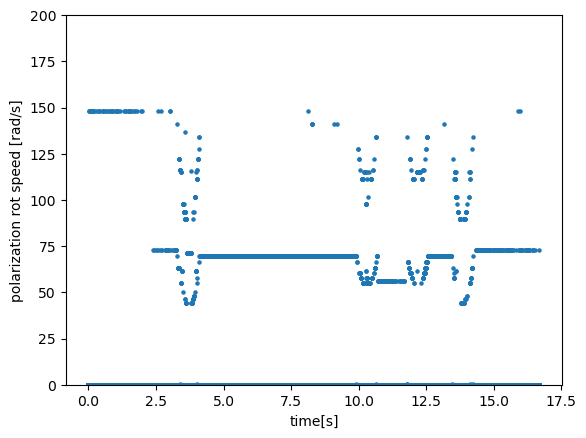

In [57]:
# Plot the scatter
plt.scatter(global_time, global_rot_speed,s=5)
plt.ylim(0.0, 200.0)
plt.xlabel("time[s]")
plt.ylabel("polarization rot speed [rad/s]")
plt.show()